<div id="container" style="position:relative;">
<div style="float:left"><h1> Data Prep and Exploration</h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>



Data preparation and exploratory data analysis (EDA) are two processes that go hand in hand.

Before we can carry out any real meaningful analysis using data we must always go through the process of making sure our dataset is clean and fit for purpose. We can then begin exploring the data itself to build initial intuition about the trends contained within the data that could help us answer further questions or guide us other downstream tasks such as modeling. 

In this codealong we will go through the process of preparing and exploring a new dataset. Our aim is to build comfort using Pandas to clean data and develop a framework we can use whenever we need to clean data.  

### Dataset

We will be using a real world bank marketing dataset. The dataset contains information about customers who were contacted as part of a telephone marketing campaign trying to get customers to sign up for a term deposit product. The dataset also contains information about whether the customer has been contacted as part of the current marketing campaign or had been as part of a previous campaign. 

#### Data Dictionary

To help us with our analysis, take some time to study the data dictionary below. 

Demographic & client data:
- age (numeric)
- job (categorical)
- marital: marital status (categorical, note: 'divorced' means divorced or widowed)
- education (categorical)
- credit_in_default: has credit in default? (categorical)
- housing_loan: has housing loan? (categorical)
- personal_loan: has personal loan? (categorical)

Data about the calls from *this* campaign:
- last_contact_type: contact communication type (categorical)
- last_contact_month: last contact month of year (categorical)
- last_contact_day: last contact day of the week (categorical)
- last_contact_duration: last contact duration, in seconds (numeric)
- last_contact_duration_mins: last contact duration, in minutes (numeric)
- n_contacts_this_campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Data about calls from *previous* campaigns:
- n_contacts_prev_campaign: number of contacts performed before this campaign and for this client (numeric)
- prev_campaign_outcome: outcome of the previous marketing campaign (categorical)

Field of interest:
- registered: has the client registered for a term deposit?

### Question of interest

Imagine we work as a data analyst/scientist within the marketing department of the bank which owns this data. Our manger asks us to investigate the following: 

> How do customers who registered for the term deposit product differ from those who did not? This can be in terms of customer demographics or in terms of features of the current and prior marketing campaign. 


### Plan of attack (aka the Data Science Framework)

1. Acquire data ✅
2. Wrangle, process & clean the data
3. EDA - Exploratory Data Analysis
    - summary statistics
    - plots
    - looking at univariate and bivariate distributions (single columns and interaction between columns)
4. Insights and conclusions
    - communicate that efficiently to stakeholders

TIP: press `2` or `3` etc over a cell to add the header styling.

## Data Loading 

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

The data is actually ;-separated so we need to specify that at loading and use the first, unnamed column as an index.

In [7]:
raw_data = pd.read_csv("data/bank-marketing-data.csv", sep=";", index_col=0)

raw_data.head()

,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,prev_campaign_outcome,registered
0,38.0,student - Albufeira,divorced,unknown,no,no,no,cellular,may,tue,244.0,3,999,0,nonexistent,no
1,34.0,services - Mealhada,married,professional.course,no,no,no,cellular,may,mon,190.0,3,999,0,nonexistent,no
2,43.0,housemaid - Vila Franca de Xira,NaN,NaN,unknown,yes,yes,cellular,jul,thu,97.0,2,999,0,nonexistent,no
3,75.0,retired - Mirandela,married,basic.4y,no,no,no,cellular,oct,wed,113.0,2,999,0,nonexistent,no
4,58.0,retired - Funchal,married,unknown,no,unknown,unknown,telephone,may,tue,174.0,1,999,0,nonexistent,no


In [8]:
raw_data.tail()

,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,prev_campaign_outcome,registered
11715,39.0,services - Funchal,divorced,high.school,unknown,yes,no,telephone,jun,mon,241.0,5,999,0,nonexistent,no
11716,44.0,blue-collar - Moura,NaN,basic.4y,no,yes,no,cellular,aug,tue,NaN,3,999,0,nonexistent,no
11717,NaN,housemaid - Valongo,divorced,NaN,unknown,no,no,telephone,may,tue,115.0,1,999,0,nonexistent,no
11718,35.0,technician - Vila Nova de Santo André,NaN,professional.course,no,no,no,telephone,mar,thu,282.0,2,6,1,success,no
11719,36.0,blue-collar - Tondela,single,high.school,unknown,no,no,telephone,may,mon,NaN,2,999,0,nonexistent,no


In [9]:
raw_data.sample(15)

,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,prev_campaign_outcome,registered
1685,39.0,admin. - Mealhada,single,high.school,no,no,no,cellular,mar,tue,119.0,5,999,0,nonexistent,no
1262,37.0,blue-collar - Rio Tinto,married,basic.4y,no,yes,no,cellular,nov,thu,138.0,1,999,0,nonexistent,no
8625,32.0,admin. - Rio Tinto,single,university.degree,no,yes,no,cellular,apr,thu,495.0,1,999,0,nonexistent,yes
5011,31.0,NaN,married,NaN,no,no,no,cellular,may,tue,176.0,1,999,0,nonexistent,no
9965,36.0,admin. - Esmoriz,single,university.degree,no,no,no,cellular,aug,tue,278.0,1,999,0,nonexistent,yes
5494,26.0,technician - Gandra,single,high.school,no,no,no,cellular,jul,thu,224.0,2,999,0,nonexistent,no
7192,56.0,blue-collar - Covilhã,married,professional.course,no,yes,no,telephone,may,mon,621.0,4,999,0,nonexistent,yes
9418,34.0,technician - Agualva-Cacém,single,NaN,no,yes,no,cellular,may,mon,601.0,2,999,1,failure,yes
8678,45.0,admin. - Portimão,married,high.school,no,yes,yes,cellular,apr,fri,636.0,3,999,0,nonexistent,yes
6251,NaN,technician - Vila do Conde,married,professional.course,no,no,no,telephone,jun,wed,188.0,1,999,0,nonexistent,no


This quick check seems to show that the data is loaded correctly now.

In [10]:
raw_data.shape

(11720, 16)

We have 11720 rows and 16 columns, storing various types of information: strings, dates and numeric columns. 

In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11720 entries, 0 to 11719
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       11132 non-null  float64
 1   job                       11027 non-null  object 
 2   marital                   10992 non-null  object 
 3   education                 11005 non-null  object 
 4   credit_in_default         11720 non-null  object 
 5   housing_loan              11720 non-null  object 
 6   personal_loan             11720 non-null  object 
 7   last_contact_type         11720 non-null  object 
 8   last_contact_month        11720 non-null  object 
 9   last_contact_day          11720 non-null  object 
 10  last_contact_duration     8841 non-null   float64
 11  n_contacts_this_campaign  11720 non-null  int64  
 12  days_since_last_contact   11720 non-null  int64  
 13  n_contacts_prev_campaign  11720 non-null  int64  
 14  prev_c

The `object` data type refers often to categorical columns. We see that a number of columns have missing values including ` age`, `job`, `education`, most significantly `last_contact_duration` (around ~20%).

**Plan for cleaning**
- make sure that the columns have the right data types
- check for missing data and deal with them appropriately
- check for duplicate information (both in term of columns and rows)

### Data Cleaning

The bank has provided us with this snapshot of demographic and campaign data related to the term deposit product. First, let's read in the data and take a look at what we're working with, and assess the level of cleaning and preprocessing that needs to be done.

#### Data Types 

In [12]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11720 entries, 0 to 11719
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       11132 non-null  float64
 1   job                       11027 non-null  object 
 2   marital                   10992 non-null  object 
 3   education                 11005 non-null  object 
 4   credit_in_default         11720 non-null  object 
 5   housing_loan              11720 non-null  object 
 6   personal_loan             11720 non-null  object 
 7   last_contact_type         11720 non-null  object 
 8   last_contact_month        11720 non-null  object 
 9   last_contact_day          11720 non-null  object 
 10  last_contact_duration     8841 non-null   float64
 11  n_contacts_this_campaign  11720 non-null  int64  
 12  days_since_last_contact   11720 non-null  int64  
 13  n_contacts_prev_campaign  11720 non-null  int64  
 14  prev_c

In [13]:
raw_data.head()

,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,prev_campaign_outcome,registered
0,38.0,student - Albufeira,divorced,unknown,no,no,no,cellular,may,tue,244.0,3,999,0,nonexistent,no
1,34.0,services - Mealhada,married,professional.course,no,no,no,cellular,may,mon,190.0,3,999,0,nonexistent,no
2,43.0,housemaid - Vila Franca de Xira,NaN,NaN,unknown,yes,yes,cellular,jul,thu,97.0,2,999,0,nonexistent,no
3,75.0,retired - Mirandela,married,basic.4y,no,no,no,cellular,oct,wed,113.0,2,999,0,nonexistent,no
4,58.0,retired - Funchal,married,unknown,no,unknown,unknown,telephone,may,tue,174.0,1,999,0,nonexistent,no


Notes: 
- the `job` columns seems to store location as well, can we get it out somehow?
- the date looking columns can't really be converted now (we don't even have a year)
- some of the numeric columns and datatypes can be optimized (enough to have smaller integer types)

Questions:
- Could we get exact birthdays which might relevant for marketing campaigns?

#### Duplicate data 

We assumed that each row in the data corresponds to a unique customer.

In [14]:
# a TRue/False array, marking whether a row appears more than once
raw_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11715     True
11716     True
11717     True
11718     True
11719     True
Length: 11720, dtype: bool

The number of duplicate rows is 51:

In [15]:
# the sum of the boolean array gives the number of TRue's
raw_data.duplicated().sum()

51

Less than half percent of the data is what is duplicated:

In [17]:
# the % of duplicates
raw_data.duplicated().sum()/raw_data.shape[0]*100

0.4351535836177475

In some situations, we can spot patterns in these special rows, now nothing stands out.

In [19]:
raw_data.loc[raw_data.duplicated(), :].sort_values("age")

,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,prev_campaign_outcome,registered
11689,24.0,services - Torres Vedras,single,high.school,no,no,no,telephone,may,wed,260.0,1,999,0,nonexistent,no
11700,24.0,NaN,single,high.school,no,yes,no,cellular,sep,mon,202.0,1,999,3,failure,no
11707,26.0,admin. - Loulé,NaN,high.school,no,no,no,telephone,oct,fri,NaN,2,4,1,success,yes
11681,27.0,student - Santa Comba Dão,single,university.degree,no,no,yes,cellular,nov,mon,118.0,1,999,0,nonexistent,yes
11704,27.0,student - Lourosa,single,high.school,no,no,no,telephone,oct,tue,187.0,1,999,0,nonexistent,yes
11712,29.0,technician - Lourosa,NaN,professional.course,no,yes,no,cellular,may,mon,487.0,1,999,0,nonexistent,yes
11673,29.0,blue-collar - Covilhã,married,basic.9y,no,yes,no,cellular,may,mon,666.0,1,999,0,nonexistent,yes
11711,30.0,admin. - Oliveira de Azeméis,married,unknown,no,yes,no,cellular,jun,fri,207.0,2,4,1,success,yes
11676,30.0,student - Covilhã,single,high.school,no,no,no,telephone,jun,wed,1242.0,1,999,0,nonexistent,yes
11713,32.0,technician - Agualva-Cacém,single,professional.course,no,yes,no,cellular,apr,mon,54.0,1,999,0,nonexistent,no


Since this is such a small proportion of our total data and we would like to work with unique customers, we can safely discard these rows.

In [21]:
clean_data = raw_data.drop_duplicates()

In [22]:
clean_data.shape

(11669, 16)

The shape checks out!

Now, checking for duplicate columns:

In [26]:
# use transpose to make the original columns the rows and then apply .duplicated()

clean_data.T.duplicated()

age                         False
job                         False
marital                     False
education                   False
credit_in_default           False
housing_loan                False
personal_loan               False
last_contact_type           False
last_contact_month          False
last_contact_day            False
last_contact_duration       False
n_contacts_this_campaign    False
days_since_last_contact     False
n_contacts_prev_campaign    False
prev_campaign_outcome       False
registered                  False
dtype: bool

We could have "false negatives" here, for example, if contact duration was both recorded in hours and minutes. We would then need to check that the conversion would make one column exactly equal the other.

#### Identifying and dealing with missing values 

First, we look at the number of missing values in each column:

In [28]:
# axis=0 means summing the rows
clean_data.isna().sum(axis=0)

age                          582
job                          689
marital                      720
education                    711
credit_in_default              0
housing_loan                   0
personal_loan                  0
last_contact_type              0
last_contact_month             0
last_contact_day               0
last_contact_duration       2865
n_contacts_this_campaign       0
days_since_last_contact        0
n_contacts_prev_campaign       0
prev_campaign_outcome          0
registered                     0
dtype: int64

Let's look at the percentage of missing values instead:

In [30]:
clean_data.isna().sum(axis=0)/clean_data.shape[0]*100

age                          4.987574
job                          5.904533
marital                      6.170195
education                    6.093067
credit_in_default            0.000000
housing_loan                 0.000000
personal_loan                0.000000
last_contact_type            0.000000
last_contact_month           0.000000
last_contact_day             0.000000
last_contact_duration       24.552232
n_contacts_this_campaign     0.000000
days_since_last_contact      0.000000
n_contacts_prev_campaign     0.000000
prev_campaign_outcome        0.000000
registered                   0.000000
dtype: float64

We have a few options in general:
- we can try to acquire the missing information from somewhere (external resources - Google - internally ask the company for the information)
- we can infer the missing information from other columns
- we can use median/mean to fill in the missing values (or other information from the same column) but this might introduce some biases - e.g. we can group by some other column, get the age of each group and fill with that
- **LAST RESORT**: drop the rows with the missing values or drop the whole column.

Terminology: _imputation_ is the process of filling in missing values.

#### Missing values in `age` 

We have <5% of the data missing, we are trying to avoid dropping the rows or columns so lets look at the distribution:

In [31]:
clean_data["age"].describe()

count    11087.000000
mean        40.379634
std         11.702569
min         17.000000
25%         32.000000
50%         38.000000
75%         48.000000
max         98.000000
Name: age, dtype: float64

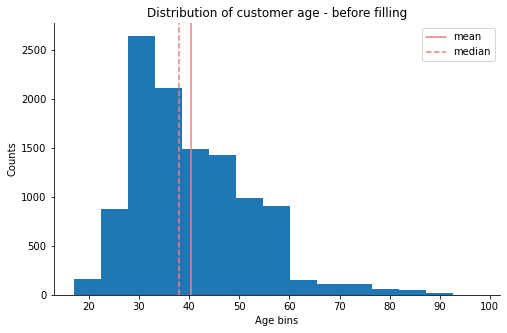

In [52]:
plt.figure(figsize=(8, 5))

plt.hist(clean_data["age"], bins=15)

plt.axvline(clean_data["age"].mean(), color="lightcoral", label="mean")
plt.axvline(clean_data["age"].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of customer age - before filling")
plt.ylabel('Counts')
plt.xlabel("Age bins")
sns.despine()

plt.legend()
plt.show()

We see that 50% of our customers are at most 38 years old and there is a steep drop at 60 for our number of customers with only a few people about 70-80. The mean and median are relatively close but the distribution is slightly right skewed. Most customers come from around the 30 year old bin.

In [57]:
clean_data["age"].mode()[0]

31.0

We make the decision to use 31 as the filling value hoping that it would skew the distribution the least.

In [58]:
# fill with mode
age_mode = clean_data["age"].mode()[0]

clean_data.loc[:, "age"] = clean_data.loc[:, "age"].fillna(age_mode)

/Users/danielsoukup/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [59]:
# sanity check

clean_data["age"].isna().sum()

0

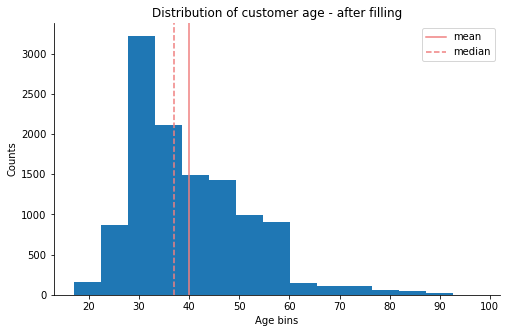

In [61]:
plt.figure(figsize=(8, 5))

plt.hist(clean_data["age"], bins=15)

plt.axvline(clean_data["age"].mean(), color="lightcoral", label="mean")
plt.axvline(clean_data["age"].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of customer age - after filling")
plt.ylabel('Counts')
plt.xlabel("Age bins")
sns.despine()

plt.legend()
plt.show()

In [62]:
clean_data.isna().sum()

age                            0
job                          689
marital                      720
education                    711
credit_in_default              0
housing_loan                   0
personal_loan                  0
last_contact_type              0
last_contact_month             0
last_contact_day               0
last_contact_duration       2865
n_contacts_this_campaign       0
days_since_last_contact        0
n_contacts_prev_campaign       0
prev_campaign_outcome          0
registered                     0
dtype: int64

#### Missing values in `last_contact_duration`

We had ~25% of the values missing here - this is a large concern because any adhoc fill value would seriously change the distribution.

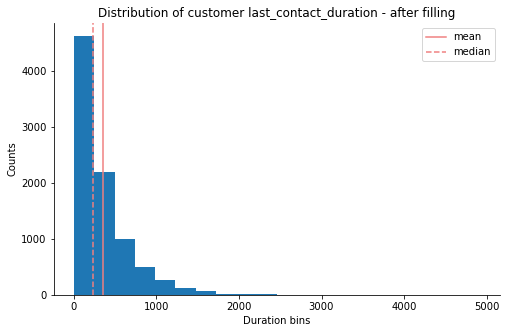

In [64]:
plt.figure(figsize=(8, 5))

plt.hist(clean_data["last_contact_duration"], bins=20)

plt.axvline(clean_data["last_contact_duration"].mean(), color="lightcoral", label="mean")
plt.axvline(clean_data["last_contact_duration"].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of customer last_contact_duration - after filling")
plt.ylabel('Counts')
plt.xlabel("Duration bins")
sns.despine()

plt.legend()
plt.show()

This seems like an exponential distribution - we are not surprised by this. Most of the values are small, concentrated around the 0 and the mean.

In [66]:
clean_data["last_contact_duration"].describe()

count    8804.000000
mean      348.923217
std       338.602356
min         1.000000
25%       130.000000
50%       232.500000
75%       458.000000
max      4918.000000
Name: last_contact_duration, dtype: float64

We can assume (?) that these values are measured in seconds (the mean and median differs by around 2 minutes).

Notes:
- filling would change the distribution significantly
- how important is this information? can we drop it?

Does last_contact_duration affect the registration status?

In [74]:
clean_data.groupby("registered")["last_contact_duration"].agg(["mean", "median"])

,mean,median
registered,,
no,218.913445,164.0
yes,545.850328,443.0


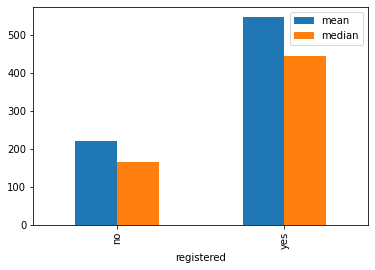

In [69]:
clean_data.groupby("registered")["last_contact_duration"].agg(["mean", "median"]).plot(kind="bar")
plt.show()

There does seem to be a large difference in previous call times when you compare folks who registered vs those who didn't. On average, the call time is twice as long for those who registered. This is strongly in favour of not dropping this column.

We will fill in with the median (default choice, much less sensitive to outliers than the mean).

In [75]:
duration_median = clean_data["last_contact_duration"].median()

clean_data["last_contact_duration"] = clean_data["last_contact_duration"].fillna(duration_median)

/Users/danielsoukup/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [76]:
clean_data.isna().sum()

age                           0
job                         689
marital                     720
education                   711
credit_in_default             0
housing_loan                  0
personal_loan                 0
last_contact_type             0
last_contact_month            0
last_contact_day              0
last_contact_duration         0
n_contacts_this_campaign      0
days_since_last_contact       0
n_contacts_prev_campaign      0
prev_campaign_outcome         0
registered                    0
dtype: int64

#### Missing values in `job` 

We saw some mixed information here about occupation and location and ~6% of the data was missing:

In [86]:
clean_data["job"].sample(10)

3542          technician - Santana
316           technician - Santana
5578            technician - Viseu
9705        management - Esposende
9123         blue-collar - Tondela
9697     self-employed - Mirandela
251        blue-collar - Ermesinde
10498          retired - Vila Real
5874          management - Gouveia
1212             services - Loures
Name: job, dtype: object

There is a pattern, the occupation is separated from the location by a `-` symbol.

In [89]:
# TRICK: use Pandas string method to split by a fixed character
clean_data["job"].str.split(" - ")

0                    [student, Albufeira]
1                    [services, Mealhada]
2        [housemaid, Vila Franca de Xira]
3                    [retired, Mirandela]
4                      [retired, Funchal]
                       ...               
11665                    [retired, Serpa]
11666                   [retired, Chaves]
11667                  [admin., Portimão]
11668            [retired, Agualva-Cacém]
11669         [technician, Vila do Conde]
Name: job, Length: 11669, dtype: object

We split the string and add these new columns to the `clean_data` dataframe:

In [92]:
job_dataframe = clean_data["job"].str.split(" - ", expand=True)

job_dataframe.head()

,0,1
0,student,Albufeira
1,services,Mealhada
2,housemaid,Vila Franca de Xira
3,retired,Mirandela
4,retired,Funchal


In [94]:
job_dataframe = job_dataframe.rename(columns={0: "occupation", 1: "location"})

job_dataframe.head()

,occupation,location
0,student,Albufeira
1,services,Mealhada
2,housemaid,Vila Franca de Xira
3,retired,Mirandela
4,retired,Funchal


In [96]:
# axis 1 refers to adding these as new columns
clean_data = pd.concat([clean_data, job_dataframe], axis=1)

clean_data.head()

,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,prev_campaign_outcome,registered,occupation,location
0,38.0,student - Albufeira,divorced,unknown,no,no,no,cellular,may,tue,244.0,3,999,0,nonexistent,no,student,Albufeira
1,34.0,services - Mealhada,married,professional.course,no,no,no,cellular,may,mon,190.0,3,999,0,nonexistent,no,services,Mealhada
2,43.0,housemaid - Vila Franca de Xira,NaN,NaN,unknown,yes,yes,cellular,jul,thu,97.0,2,999,0,nonexistent,no,housemaid,Vila Franca de Xira
3,75.0,retired - Mirandela,married,basic.4y,no,no,no,cellular,oct,wed,113.0,2,999,0,nonexistent,no,retired,Mirandela
4,58.0,retired - Funchal,married,unknown,no,unknown,unknown,telephone,may,tue,174.0,1,999,0,nonexistent,no,retired,Funchal


In [97]:
clean_data = clean_data.drop(columns="job")

clean_data.head()

,age,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,prev_campaign_outcome,registered,occupation,location
0,38.0,divorced,unknown,no,no,no,cellular,may,tue,244.0,3,999,0,nonexistent,no,student,Albufeira
1,34.0,married,professional.course,no,no,no,cellular,may,mon,190.0,3,999,0,nonexistent,no,services,Mealhada
2,43.0,NaN,NaN,unknown,yes,yes,cellular,jul,thu,97.0,2,999,0,nonexistent,no,housemaid,Vila Franca de Xira
3,75.0,married,basic.4y,no,no,no,cellular,oct,wed,113.0,2,999,0,nonexistent,no,retired,Mirandela
4,58.0,married,unknown,no,unknown,unknown,telephone,may,tue,174.0,1,999,0,nonexistent,no,retired,Funchal


It seems we have the same occupation and location missing (this could be verified).

In [98]:
clean_data.isna().sum()

age                           0
marital                     720
education                   711
credit_in_default             0
housing_loan                  0
personal_loan                 0
last_contact_type             0
last_contact_month            0
last_contact_day              0
last_contact_duration         0
n_contacts_this_campaign      0
days_since_last_contact       0
n_contacts_prev_campaign      0
prev_campaign_outcome         0
registered                    0
occupation                  689
location                    689
dtype: int64

Let's see the occupation distribution:

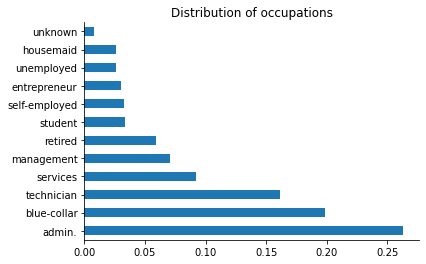

In [103]:
clean_data["occupation"].value_counts(normalize=True).plot(kind="barh")
plt.title("Distribution of occupations")
sns.despine()
plt.show()

Observations:
- most frequent are admin, blue-collar and technician (more than 60% of the total these three)
- there is an unknown category

We could try to understand why the data is missing:
- is it missing at random?
- are there any relationship between missing and other features?

We can use the `unknown` category to fill in the missing values.

In [104]:
clean_data["occupation"] = clean_data["occupation"].fillna("unknown")

In [105]:
clean_data.isna().sum()

age                           0
marital                     720
education                   711
credit_in_default             0
housing_loan                  0
personal_loan                 0
last_contact_type             0
last_contact_month            0
last_contact_day              0
last_contact_duration         0
n_contacts_this_campaign      0
days_since_last_contact       0
n_contacts_prev_campaign      0
prev_campaign_outcome         0
registered                    0
occupation                    0
location                    689
dtype: int64

Let's repeat the same process for `education`, `marital` and `location`.

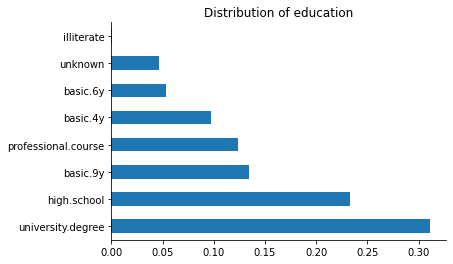

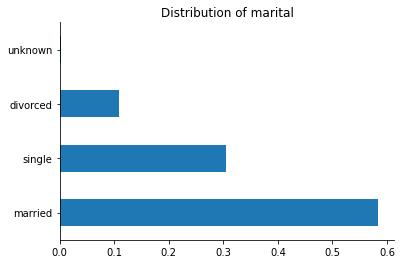

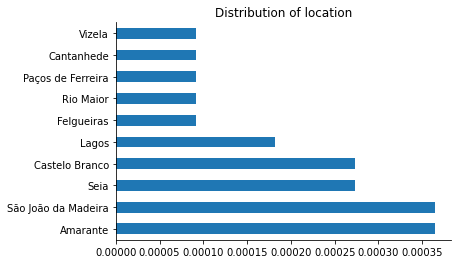

In [107]:
# repeat the barchart for all three
# limit to top 10 counts - too many locations to plot
for column in ["education", "marital", "location"]:
    clean_data[column].value_counts(normalize=True).tail(10).plot(kind="barh")

    plt.title(f"Distribution of {column}")
    plt.show()

Notes:
- most customers come with a university degree or high-school
- most customers are married
- there are a high number of locations but even the most frequent occurs a relatively small number of times.

We will take the same approach and fill with the `unknown` value:

In [109]:
for column in ["education", "marital", "location"]:
    clean_data[column] = clean_data[column].fillna("unknown")

Finally, our data set is all clean:

In [110]:
clean_data.isna().sum()

age                         0
marital                     0
education                   0
credit_in_default           0
housing_loan                0
personal_loan               0
last_contact_type           0
last_contact_month          0
last_contact_day            0
last_contact_duration       0
n_contacts_this_campaign    0
days_since_last_contact     0
n_contacts_prev_campaign    0
prev_campaign_outcome       0
registered                  0
occupation                  0
location                    0
dtype: int64

In [111]:
pd.__version__

'1.1.3'

### Exploratory Data Analysis (EDA)
Now that we've cleaned the data, let's do some analysis to address our original question: "What are the characteristics of the customers who register for the term deposit account?"

We will divide our data into categorical and numeric and proceed in this way.

In [113]:
clean_data.select_dtypes(["float", "int"]).columns

Index(['age', 'last_contact_duration', 'n_contacts_this_campaign',
       'days_since_last_contact', 'n_contacts_prev_campaign'],
      dtype='object')

In [114]:
clean_data.select_dtypes(["object"]).columns

Index(['marital', 'education', 'credit_in_default', 'housing_loan',
       'personal_loan', 'last_contact_type', 'last_contact_month',
       'last_contact_day', 'prev_campaign_outcome', 'registered', 'occupation',
       'location'],
      dtype='object')

Time permitting, we would look at and analyze all the univariate distributions:
- histograms for numeric fields
- counts and bar charts for the categorical ones.

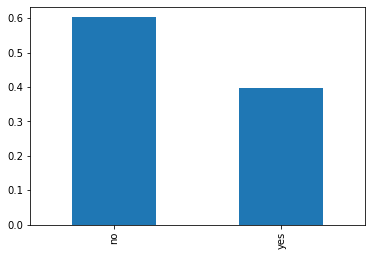

In [115]:
clean_data["registered"].value_counts(normalize=True).plot(kind="bar")
plt.show()

There is a 60-40 split between the customers not registering/registering for the term deposit.

Lets see if certain occupations are more likely to sign up for the term deposit:

In [118]:

clean_data.groupby(["occupation", "registered"])["registered"].count() / clean_data.groupby("occupation")["registered"].count()









occupation     registered
admin.         no            0.564209
               yes           0.435791
blue-collar    no            0.724771
               yes           0.275229
entrepreneur   no            0.648318
               yes           0.351682
housemaid      no            0.652482
               yes           0.347518
management     no            0.593068
               yes           0.406932
retired        no            0.366460
               yes           0.633540
self-employed  no            0.609551
               yes           0.390449
services       no            0.700000
               yes           0.300000
student        no            0.300813
               yes           0.699187
technician     no            0.605769
               yes           0.394231
unemployed     no            0.534722
               yes           0.465278
unknown        no            0.599743
               yes           0.400257
Name: registered, dtype: float64

Looking at this and comparing to the base rate of registering, the student and retired stands out, much higher registration rates for these groups (70% for students and 63% for retired, as compared to the 40% overall rate).

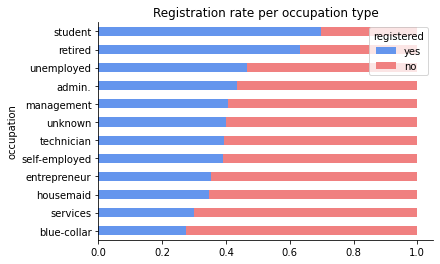

In [131]:
rate_data = clean_data.groupby(["occupation", "registered"])["registered"].count() / clean_data.groupby("occupation")["registered"].count()

rate_data.unstack()[["yes", "no"]].sort_values("yes").plot(kind="barh", stacked=True, color=["cornflowerblue", "lightcoral"])
plt.title("Registration rate per occupation type")
sns.despine()
plt.show()

Now we can repeat this analysis for all categorical columns:

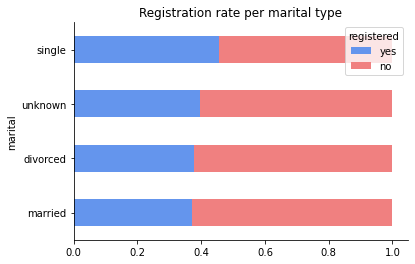

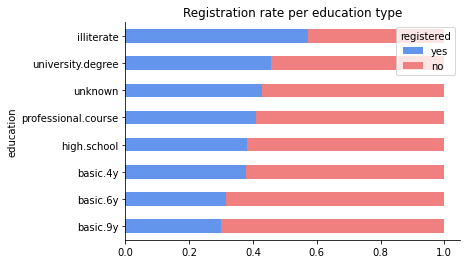

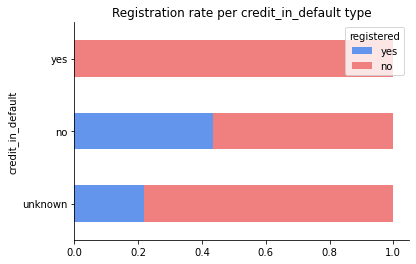

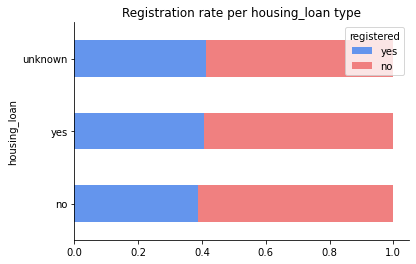

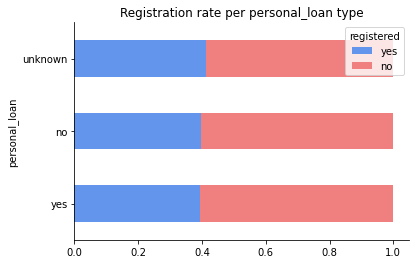

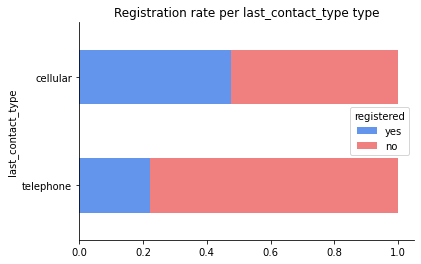

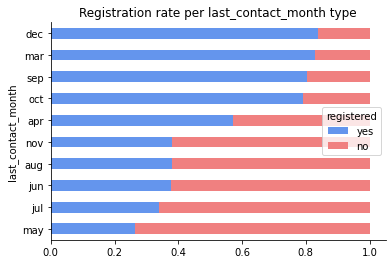

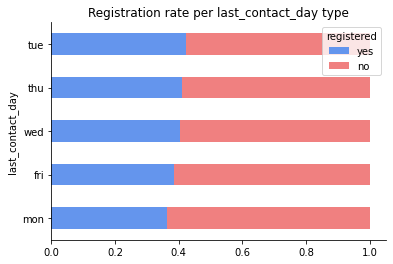

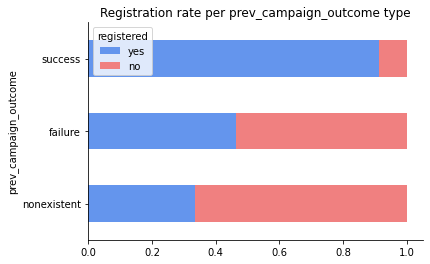

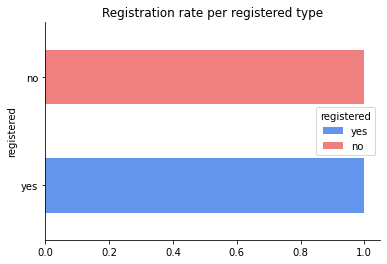

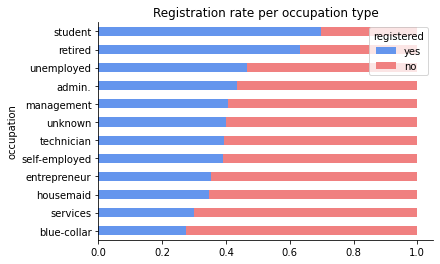

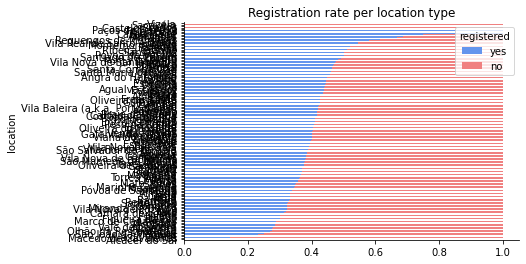

In [132]:
for column in clean_data.select_dtypes("object").columns:
    rate_data = clean_data.groupby([column, "registered"])["registered"].count() / clean_data.groupby(column)["registered"].count()

    rate_data.unstack()[["yes", "no"]].sort_values("yes").plot(kind="barh", stacked=True, color=["cornflowerblue", "lightcoral"])
    plt.title(f"Registration rate per {column} type")
    plt.show()

### Findings Summary

Based upon the above visuals, we can see that:
- From the job column, far more students and retirees are likely to register for the term deposit product proportionally speaking, than other professions. Services and blue collar far less likely to register.
- Those in the 'illiterate' category are much more likely to register
- No one who had credit in default registered
- No difference across housing loan
- No difference across personal loan
- Far more likely to register if they were contacted via cellular as opposed to land line
- Appears to be more successful months in the campaign, whereas weekday patterns are not evident
- People who previously registered in a campaign were much, much more likely to register again.

### Conclusion

From our initial analysis let's summarize what we have found out so far about the differences between customers who register versus those who do not. 

- We have found out that younger and older people were more likely to register for the term deposit product. Perhaps these groups have less need for liquidity in the near term and can therefore sacrifice access to their funds for higher return. 

- In contrast to this, people who work in employment sectors that traditionally pay hourly, have contract based work, or where most people are self employed, were far less likely than average to sign up for this product. This is probably due to a less certain/consistent future income streams 

- People who had been contacted in previous campaigns were more likely to register for the product, however this was only a small portion of total customers.  

- People who were last contacted via cellular phone and whose last contact was of longer duration were more likely to register. Continue tracking phone type and call duration to re-target appropriately. 

- Contacts who were called during the months of September, October, December, March & April showed much higher conversion rates than those in other months. It's not entirely clear why, but it's worth noting that these months also had the lowest call volume. This merits further analysis.

### Saving the data

Now that we have spent the time cleaning and exploring this dataset. We are going to save it down to file for now. In a short while, we will be using our cleaned dataset to carry out some modeling work to learn more about the customer characteristics which drive product registration! To be continued.... 

In [133]:
clean_data.to_csv("data/clean_bank_marketing.csv", index=False)

<div id="container" style="position:relative;">
<div style="position:relative; float:right"><img style="height:25px""width: 50px" src ="https://drive.google.com/uc?export=view&id=14VoXUJftgptWtdNhtNYVm6cjVmEWpki1" />
</div>
</div>